# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**


* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины. Правила переноса дедлайнов определены в презентации с первого занятия.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Задачи 1 и 2 сдаются в систему Яндекс.Контест. Ссылка на контест в телеграм-боте.


**Сдача задачи 3:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 10 баллов
* Задача 2 &mdash; 10 баллов
* Задача 3 &mdash; 80 баллов


Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 3.

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.

На дополнительном занятии 10 февраля будет показан простой пример работы с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных обучить несколько классификаторов для определения выживших, иначе говоря, получить некоторые приближенные правила определения, выжил пассажир или нет, а также сравнить эти правила по качеству приближения.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [5]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


---
### Задача 2.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [6]:
indices = np.arange(len(data))
np.random.shuffle(indices)

train_size = int(0.7 * len(data))
train_indices = indices[:train_size]
test_indices = indices[train_size:]

train_data = data.iloc[train_indices]
test_data = data.iloc[test_indices]

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [2]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [252]:
train_features,train_targets = get_features_and_target(train_data)[0], get_features_and_target(train_data)[1]
test_features,test_targets = get_features_and_target(test_data)[0], get_features_and_target(test_data)[1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S


#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

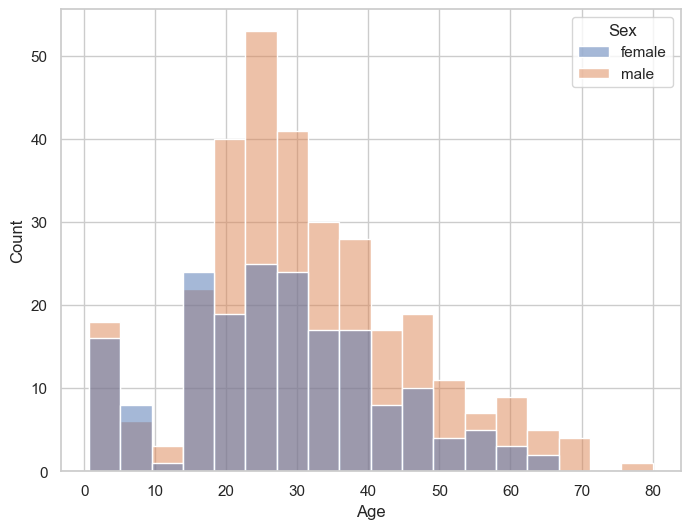

In [66]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=train_data, x='Age', hue='Sex')

Text(0.5, 1.0, 'Survival Count without Siblings')

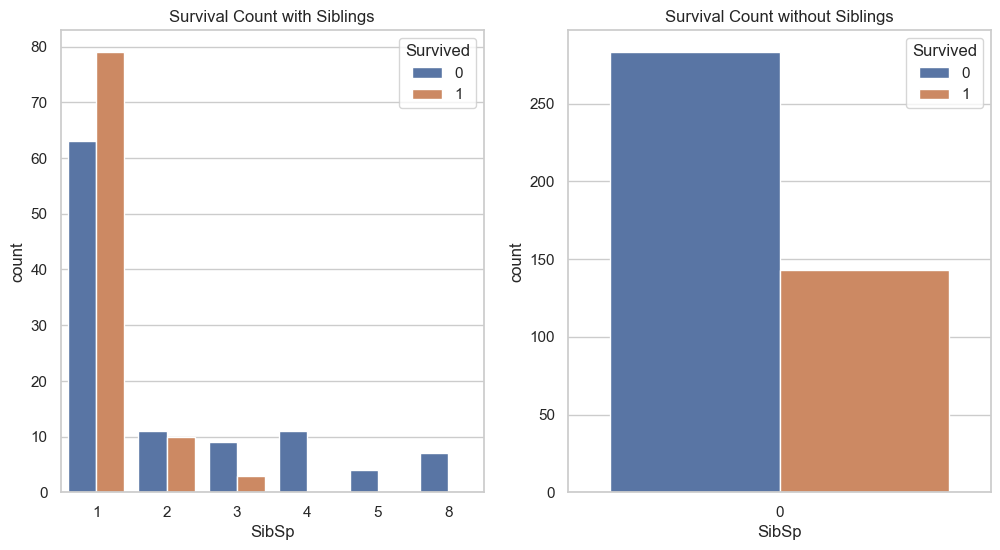

In [67]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='SibSp', hue='Survived', data=train_data[train_data['SibSp'] > 0])
plt.title('Survival Count with Siblings')

plt.subplot(1, 2, 2)
sns.countplot(x='SibSp', hue='Survived', data=train_data[train_data['SibSp'] == 0])
plt.title('Survival Count without Siblings')

Text(0.5, 1.0, 'Survival Count without Parents/Children')

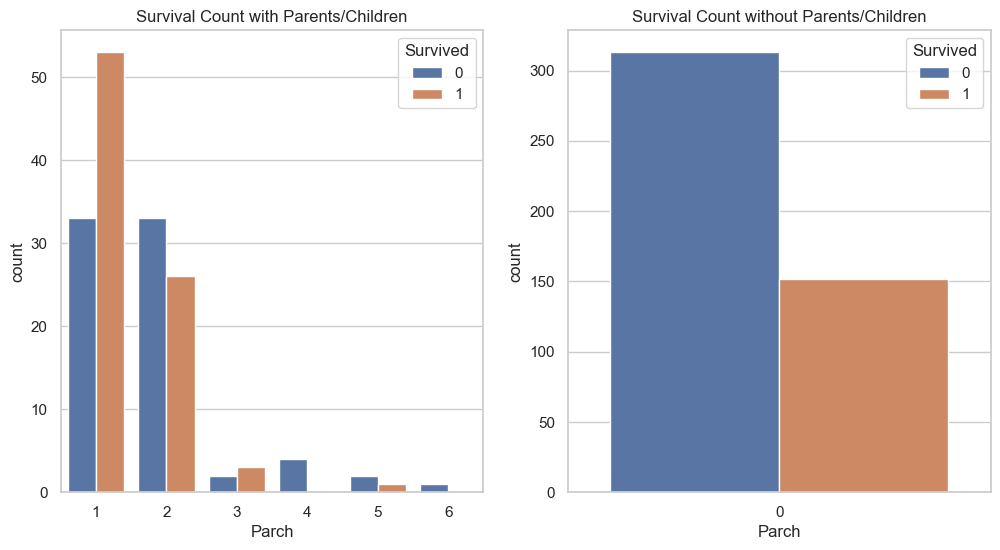

In [68]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Parch', hue='Survived', data=train_data[train_data['Parch'] > 0])
plt.title('Survival Count with Parents/Children')

plt.subplot(1, 2, 2)
sns.countplot(x='Parch', hue='Survived', data=train_data[train_data['Parch'] == 0])
plt.title('Survival Count without Parents/Children')

Text(0, 0.5, 'Count')

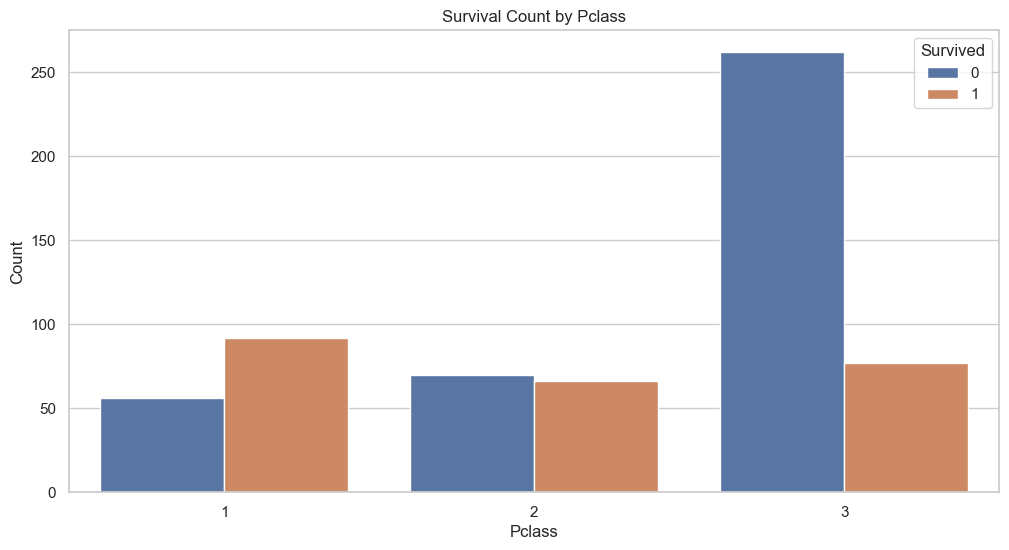

In [69]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_data)
sns.set(style='whitegrid')
plt.title('Survival Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')

Text(0, 0.5, 'Fare')

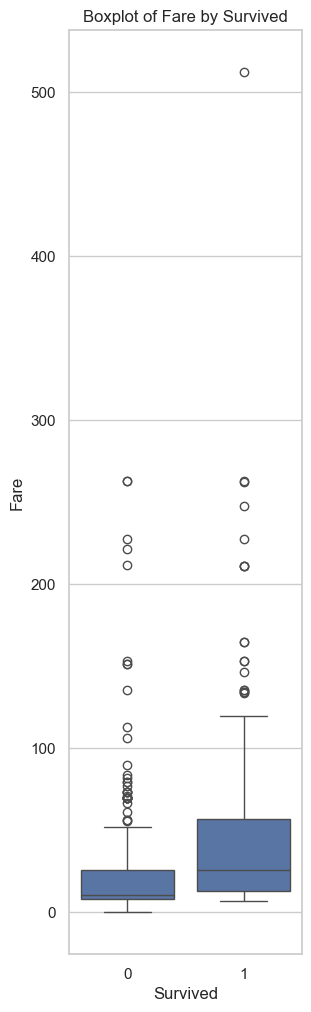

In [245]:
plt.figure(figsize=(3, 12))
sns.boxplot(x='Survived', y='Fare', data=train_data)
plt.title('Boxplot of Fare by Survived')
plt.xlabel('Survived')
plt.ylabel('Fare')

Text(0, 0.5, 'Age')

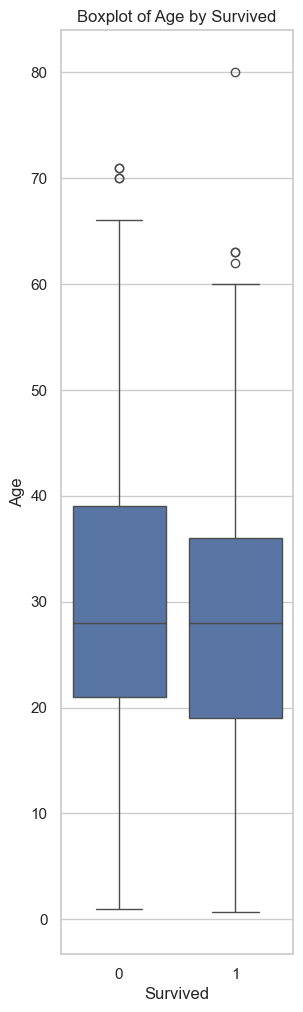

In [246]:
plt.figure(figsize=(3, 12))
sns.boxplot(x='Survived', y='Age', data=train_data)
plt.title('Boxplot of Age by Survived')
plt.xlabel('Survived')
plt.ylabel('Age')

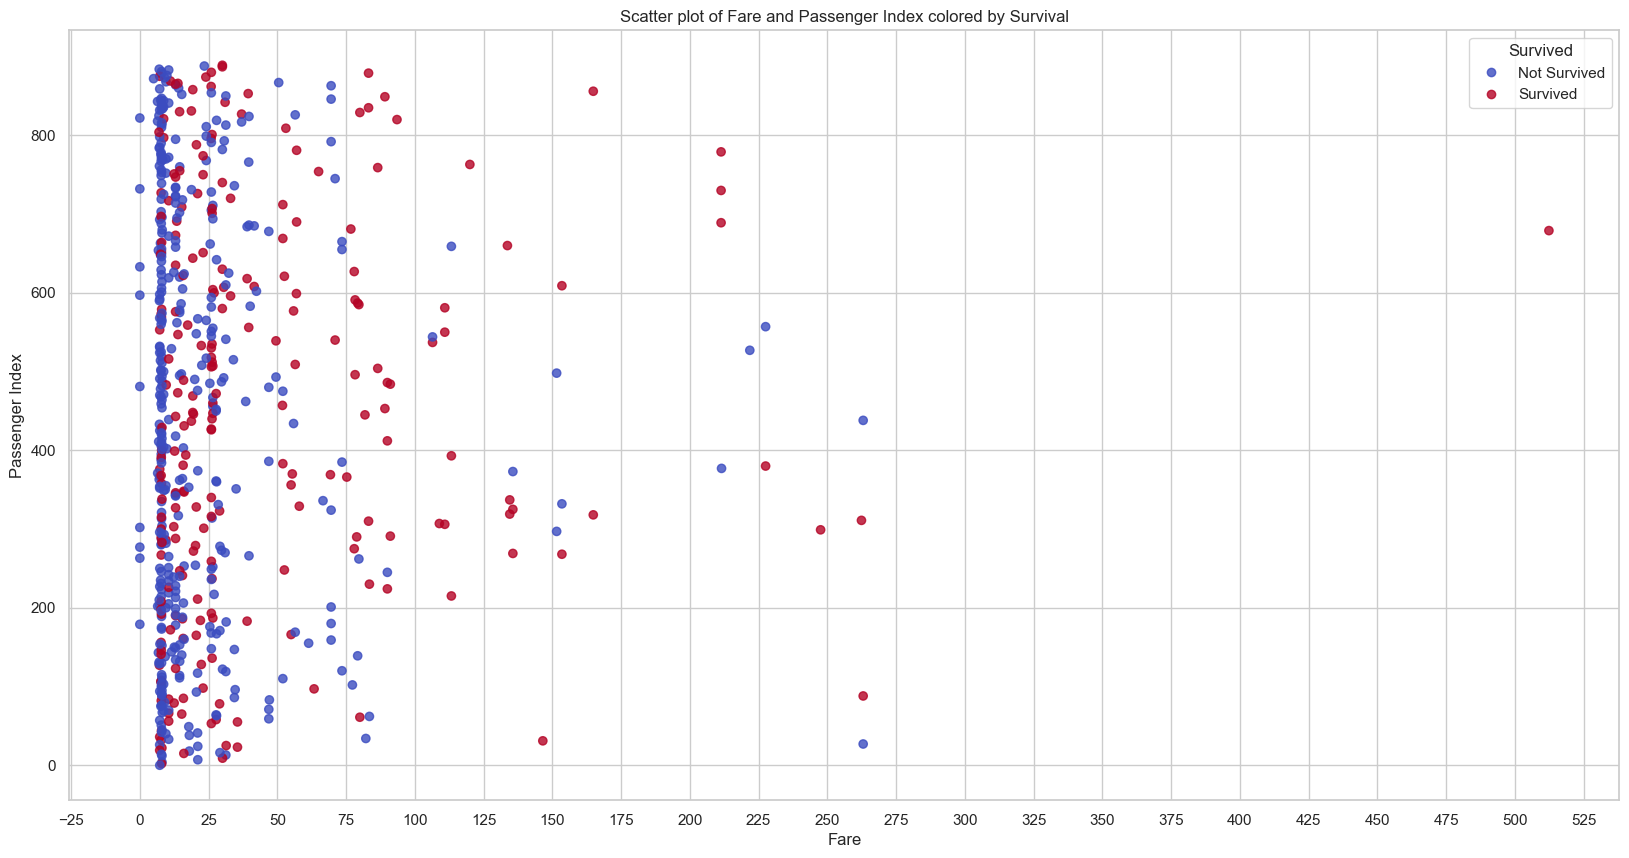

In [275]:
plt.figure(figsize=(20, 10))
plt.locator_params (axis='x', nbins= 24)
scatter = plt.scatter(train_data['Fare'], train_data.index, c=train_data['Survived'], cmap='coolwarm', alpha=0.8)
plt.xlabel('Fare')
plt.ylabel('Passenger Index')
plt.title('Scatter plot of Fare and Passenger Index colored by Survival')
plt.legend(handles=scatter.legend_elements()[0], labels=['Not Survived', 'Survived'], title='Survived')

plt.show()

C:\Users\Gregory\PycharmProjects\mipt_stats_hw\venv\lib\site-packages\matplotlib\colors.py:1318: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\Users\Gregory\PycharmProjects\mipt_stats_hw\venv\lib\site-packages\matplotlib\colors.py:1325: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
C:\Users\Gregory\PycharmProjects\mipt_stats_hw\venv\lib\site-packages\matplotlib\ticker.py:525: UserWarning: Warning: converting a masked element to nan.
  else fmt % arg)


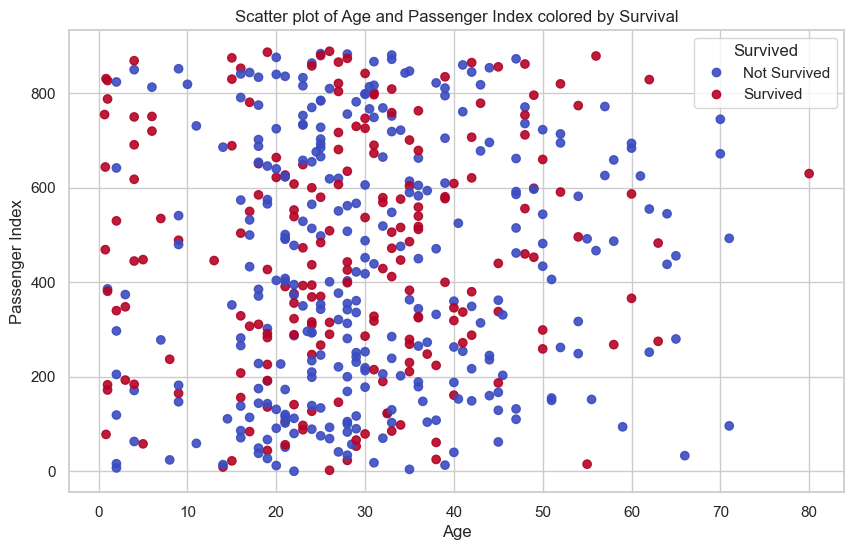

In [271]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(train_data['Age'], train_data.index, c=train_data['Survived'], cmap='coolwarm', alpha=0.9)
plt.xlabel('Age')
plt.ylabel('Passenger Index')
plt.title('Scatter plot of Age and Passenger Index colored by Survival')
plt.legend(handles=scatter.legend_elements()[0], labels=['Not Survived', 'Survived'], title='Survived')
plt.show()

#### 3. Классификация методом ближайшего соседа

Ранее в контесте вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи.

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [233]:
def matrix_multiplication(A, B):
    A_1 = np.expand_dims(A, axis=2)
    B_1 = np.expand_dims(B, axis=0)
    result = np.sum(A_1 * B_1, axis=1)
    return result

def find_nearest_points(A: np.ndarray, B: np.ndarray, k: int) -> np.ndarray:
    A_squared = np.sum(A ** 2, axis=1, keepdims=True)
    B_squared = np.sum(B ** 2, axis=1, keepdims=True)
    AB = matrix_multiplication(A, B.T)
    distances = np.sqrt(A_squared - 2 * AB + B_squared.T)
    nearest_indices = np.argsort(distances, axis=0)[:k, :]
    return np.array((nearest_indices + 1).T)

def knn(features, train_features, train_target, k):
    features_array = features[['Age', 'Fare']].values
    train_features_array = train_features[['Age', 'Fare']].values
    train_target_array = train_target.values
    nearest_indices = find_nearest_points(features_array, train_features_array, k)
    nearest_targets = train_target_array[nearest_indices.flatten() - 1]
    predicted = pd.Series(np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=nearest_targets), index=features.index)
    return predicted

Постройте классификатор методом ближайшего соседа, используя только признаки `Age` и `Fare`. 

Какую метрику (функцию расстояния) вы при этом используете? Нужно ли предварительно что-то сделать с признаками?

In [169]:
#Метрика - евклидово расстояние, в данном случае с признаками ничего не нужно делать, так как если удалить пустые строки(где неопределен возраст или плата за проезд), то мы потеряем часть данных

In [303]:
knn_predicted_vals=knn(test_features, train_features, train_targets, k=5)

Как меняется результат классификации при другом количестве соседей? Рассмотрите хотя бы три различных нечетных значения количества соседей.

In [242]:
# результат меняется от всех 1 до всех 0 и я не могу понять с чем это связано

Точность предсказаний метода k-ближайших соседей (knn): 0.6007462686567164


Как можно было бы учесть другие признаки? Какие при этом могут возникнуть проблемы? 

...

Строить классификатор с другими признаками при этом не нужно.

In [ ]:
#Признак Sex - это текстовые данные, значит его нужно перевести в числовые данные, например, 0 - female, 1 - male, тогда без проблем можно реализовать классификатор и с другими признаками

#### 4. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

...

**Дерево 2:**

...

Реализуйте полученные деревья по шаблону

In [304]:
def tree(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    predicted = []
    for _, row in features.iterrows():
        age = row['Age']
        fare = row['Fare']
        if (age < 20 and age > 40) or fare > 38:
            predicted.append(1)
        else:
            if age < 5:
                predicted.append(1)
            else:
                predicted.append(0)
    return pd.Series(predicted)

tree_predicted_vals=tree(train_features)

#### 5. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

...

Реализуйте данный критерий по шаблону

In [305]:
test_targets.info()
knn_predicted_vals.info()
def criteria(target, predicted):
    cnt=0
    for i in range(len(target.values)):
        if target.values[i]==predicted.values[i]:
            cnt+=1
    return cnt/len(target.values)

#что-то по типу f1 скора

<class 'pandas.core.series.Series'>
Index: 268 entries, 421 to 170
Series name: Survived
Non-Null Count  Dtype
--------------  -----
268 non-null    int64
dtypes: int64(1)
memory usage: 12.3 KB
<class 'pandas.core.series.Series'>
Index: 268 entries, 421 to 170
Series name: None
Non-Null Count  Dtype
--------------  -----
268 non-null    int64
dtypes: int64(1)
memory usage: 12.3 KB


Оцените качество построенных ранее моделей (два дерева, kNN), используя предложенный критерий.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [301]:
knn_criteria=criteria(test_targets, knn_predicted_vals)
tree_criteria=criteria(test_targets, tree_predicted_vals)
tree_criteria

0.5522388059701493

In [302]:
knn_criteria

0.6007462686567164

#### 6. Выводы


#knn показывает лучший результат по сравнению с tree. Глубина дерева не слишком большая поэтому, результат понятен.